In [20]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import beta


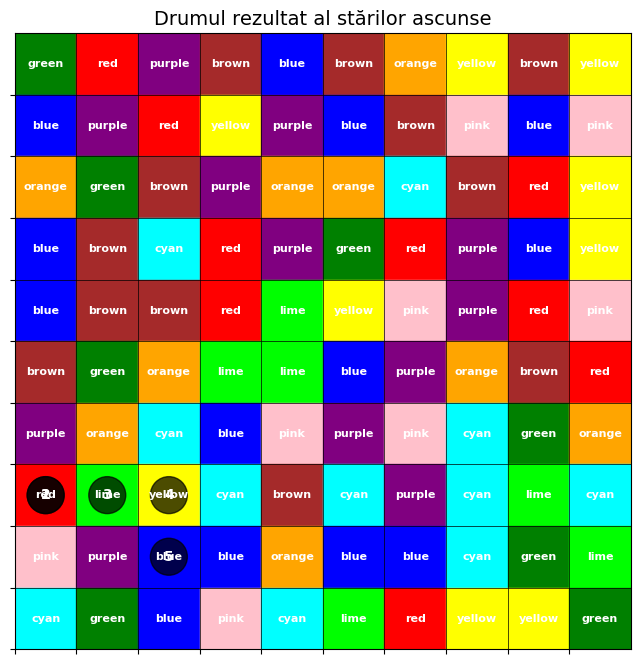

Drumul rezultat al stărilor ascunse:  [(7, 0), (7, 0), (7, 1), (7, 2), (8, 2)]
Prob. log. a secvenței :  -10.596634733096073


In [21]:
# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = ["red", "blue", "green", "yellow", "purple", "orange", "pink", "cyan", "brown", "lime"]

# Citirea gridului
df = pd.read_csv('grid_culori.csv', header=None)  # Înlocuiți cu calea completă dacă este necesar
grid_culori = df.to_numpy()

# Generarea secvenței de culori observate
observatii = ["red", "red", "lime", "yellow", "blue"]

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))
for (i, j) in stari_ascunse:
    idx_curent = stare_to_idx[(i, j)]
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)  # sus, jos, st, dr
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    transitions[idx_curent, vecini_valizi] = 1 / (len(vecini_valizi) + 1)
    transitions[idx_curent, idx_curent] = 1 / (len(vecini_valizi) + 1)

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))
for (i, j) in stari_ascunse:
    idx_stare = stare_to_idx[(i, j)]
    idx_culoare = culoare_to_idx[grid_culori[i, j]]
    emissions[idx_stare, idx_culoare] = 1

# Subpunct 2: Definirea modelului HMM și rularea algoritmului Viterbi
model = hmm.CategoricalHMM(n_components=numar_stari, n_iter=100)
model.startprob_ = np.full(numar_stari, 1 / numar_stari)
model.transmat_ = transitions
model.emissionprob_ = emissions

logprob, secventa_stari = model.decode(np.array(observatii_idx).reshape(-1, 1), algorithm="viterbi")

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Subpunct 3: Vizualizarea drumului pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare, 
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1), 
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

print("Drumul rezultat al stărilor ascunse: ", drum)
print("Prob. log. a secvenței : ", logprob)


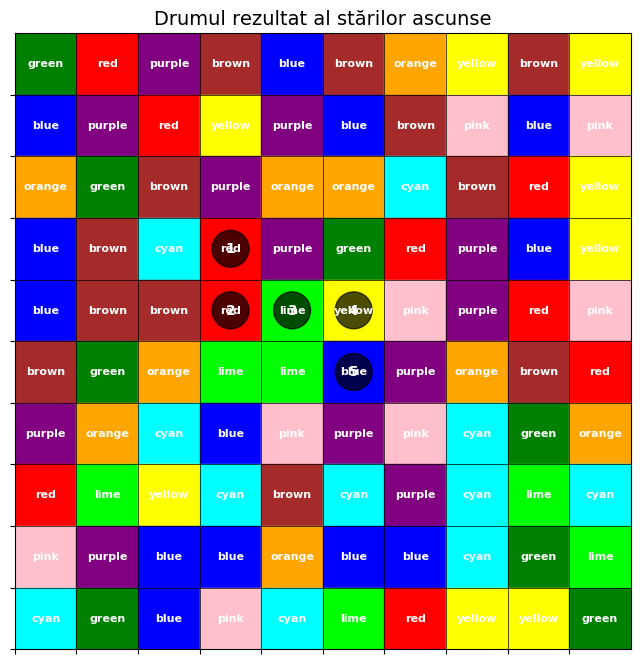

Drumul rezultat al stărilor ascunse:  [(3, 3), (4, 3), (4, 4), (4, 5), (5, 5)]
Probab. log. a secvenței :  -10.150347630467653


In [22]:
# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = ["red", "blue", "green", "yellow", "purple", "orange", "pink", "cyan", "brown", "lime"]

# Citirea gridului
df = pd.read_csv('grid_culori.csv', header=None)  # Înlocuiți cu calea completă dacă este necesar
grid_culori = df.to_numpy()

# Generarea secvenței de culori observate
observatii = ["red", "red", "lime", "yellow", "blue"]

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]

# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))
for (i, j) in stari_ascunse:
    idx_curent = stare_to_idx[(i, j)]
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)  # sus, jos, st, dr
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    transitions[idx_curent, vecini_valizi] = 1 / len(vecini_valizi)

# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))
for (i, j) in stari_ascunse:
    idx_stare = stare_to_idx[(i, j)]
    idx_culoare = culoare_to_idx[grid_culori[i, j]]
    emissions[idx_stare, idx_culoare] = 1

# Subpunct 2: Definirea modelului HMM și rularea algoritmului Viterbi
model = hmm.CategoricalHMM(n_components=numar_stari, n_iter=100)
model.startprob_ = np.full(numar_stari, 1 / numar_stari)
model.transmat_ = transitions
model.emissionprob_ = emissions

logprob, secventa_stari = model.decode(np.array(observatii_idx).reshape(-1, 1), algorithm="viterbi")

# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in secventa_stari]

# Subpunct 3: Vizualizarea drumului pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare, 
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1), 
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.show()

print("Drumul rezultat al stărilor ascunse: ", drum)
print("Probab. log. a secvenței : ", logprob)


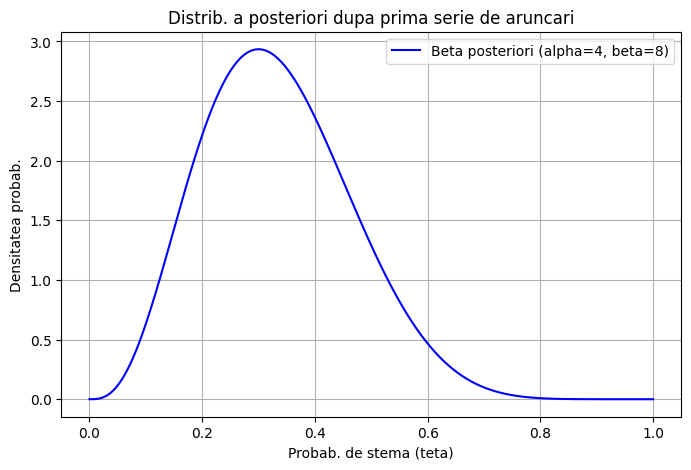

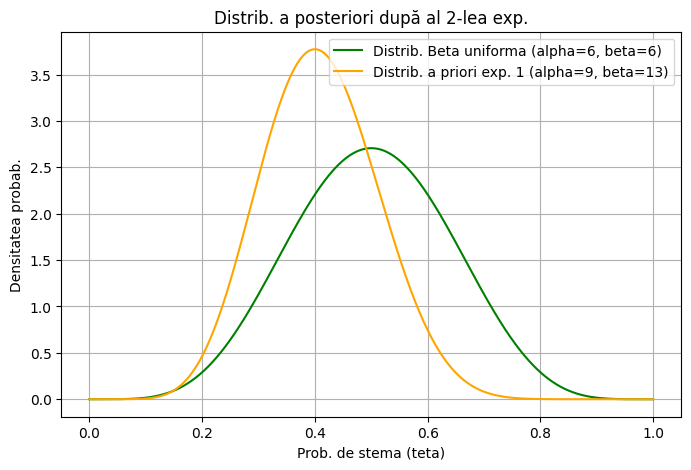

Explicatie:
1. Distrib. a posteriori cu Beta uniforma ca a priori este mai larga, reflectand incertitudinea mai mare din lipsa datelor anterioare.
2. Distrib. a posteriori cu Beta obtinuta in experimentul anterior este mai ingusta, deoarece se bazeaza pe informatiile acumulate în primul experiment.


In [23]:
aruncari_1 = ["s", "b", "b", "b", "s", "b", "s", "b", "b", "b"]
steme_1 = 3
bani_1 = 7

alpha_prior_1 = 1
beta_prior_1 = 1

alpha_posterior_1 = alpha_prior_1 + steme_1
beta_posterior_1 = beta_prior_1 + bani_1

# Distrib. a posteriori
x = np.linspace(0, 1, 1000)
posterior_1 = beta.pdf(x, alpha_posterior_1, beta_posterior_1)

plt.figure(figsize=(8, 5))
plt.plot(x, posterior_1, label=f"Beta posteriori (alpha={alpha_posterior_1}, beta={beta_posterior_1})", color="blue")
plt.title("Distrib. a posteriori dupa prima serie de aruncari")
plt.xlabel("Probab. de stema (teta)")
plt.ylabel("Densitatea probab.")
plt.legend()
plt.grid()
plt.show()

aruncari_2 = ["s", "s", "b", "s", "b", "b", "s", "b", "b", "s"]
steme_2 = 5
bani_2 = 5

# a) Distrib. a priori Beta uniforma
alpha_prior_2_a = 1
beta_prior_2_a = 1
alpha_posterior_2_a = alpha_prior_2_a + steme_2
beta_posterior_2_a = beta_prior_2_a + bani_2
posterior_2_a = beta.pdf(x, alpha_posterior_2_a, beta_posterior_2_a)

# b) Distrib. a priori obtinuta din exp. precedent
alpha_prior_2_b = alpha_posterior_1
beta_prior_2_b = beta_posterior_1
alpha_posterior_2_b = alpha_prior_2_b + steme_2
beta_posterior_2_b = beta_prior_2_b + bani_2
posterior_2_b = beta.pdf(x, alpha_posterior_2_b, beta_posterior_2_b)

plt.figure(figsize=(8, 5))
plt.plot(x, posterior_2_a, label=f"Distrib. Beta uniforma (alpha={alpha_posterior_2_a}, beta={beta_posterior_2_a})", color="green")
plt.plot(x, posterior_2_b, label=f"Distrib. a priori exp. 1 (alpha={alpha_posterior_2_b}, beta={beta_posterior_2_b})", color="orange")
plt.title("Distrib. a posteriori după al 2-lea exp.")
plt.xlabel("Prob. de stema (teta)")
plt.ylabel("Densitatea probab.")
plt.legend()
plt.grid()
plt.show()

print("Explicatie:")
print("1. Distrib. a posteriori cu Beta uniforma ca a priori este mai larga, reflectand incertitudinea mai mare din lipsa datelor anterioare.")
print("2. Distrib. a posteriori cu Beta obtinuta in experimentul anterior este mai ingusta, deoarece se bazeaza pe informatiile acumulate în primul experiment.")
